# Final Assignment

# Due date: 27/03/2016

## Introduction

We worked on several aspects of numerical reservoir engineering in separate assignments over the last couple of weeks - and here, we will now finally put things together and solve a combined fluid flow and transport problem!

The problem is conceptually still quite simple and you should be able to re-use a lot of the code you previously generated for the other assignments. 

### Assignment overview

**Note**: The main difference to previous assignments is that **you have to work on this assignment on your own** - not any more in a small group as before. When finished, please submit the finished notebook to:

<wellmann@aices.rwth-aachen.de>

Whenever possible, use the provided function definitions and return values that are given below. You are free to write more/ additional functions, but the provided functions are the ones that will be used for grading.

### Points

This assingment counts **50% to the final mark** of the exercise class.


In [1]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from __future__ import division

In [5]:
plt.rcParams['figure.figsize'] = [8, 6.]
plt.rcParams['font.size'] = 12

## Problem description

### Scenario

We are investigating here a problem of fluid flow and contaminant transport. Imagine the following scenario:

**Scenario 1**: A driver in a car along a beautiful lakeside in your favorite imaginative country takes a picture of the lake *while driving* because he (she) wants to share it with all his (her) friends on facebook. Distracted from driving, the car unfortunately drives into a ditch next to the road. Nothing really happens, but the phone is broken (oh no!) and the petrol tank damaged - and fuel leaks into the ground! This is a major problem (not the phone!) as we are in the middle of a drinking water catchment and a drinking water source is close by. You, as an expert modeller, are asked to investigate if there is a risk that the leaked fuel contaminates the source. As you are new to this type of study, you really want to get a good result, so you decide to write all the code yourself to make sure you understand how reliable your analysis is.

-----

Alternatively, consider **scenario 2**: imagine you live in King's Landing on Westeros (If you don't know what Westeros is, then don't worry and go back to scenario 1). An exhausted pyromaster accidentally spilled <a href = "http://awoiaf.westeros.org/index.php/Wildfire">Wildfire</a> during production and it leaked into the ground. The King asks you for the favor to investigate if there is a risk that the wildfire could reach his personal favorite hot water pool where he likes to enjoy moments at candlelight. As you know what happens to people who do not fulfill the King's favors, you happily agree to do so - and *really, really* don't want to mess it up...

-----


Luckily, the hydrogeological setting that we have to investigate seems to be quite simple:

1. The main flow field is down-slope from the hight of the source to the water table of the lake, without significant lateral flow: we can treat it as a 1-D case.
2. The water level at the source location and at the lake is known and we can treat these two points as Dirichlet boundary conditions.
3. We are primarily interested in the transport of the contaminant and can neglect fluctuations of the groundwater, so we treat the problem as steady-state.
4. However, we have to consider the effect of rainfall in the area as a significant factor.

### Simulation Set-up and parameters

The width of the simulated domain (between water source/ hot pool and lake/ blackwater rush) is 150 m. You quickly perform measurements of rock properties and obtain the following values:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Transmissivity | T | 0.01 | [m^2/s] |
| Hydraulic conductivity | K | 0.001 | [m/s] |
| Porosity | por | 0.2 | [] |

You decide to set-up the 1-D model domain for the simulation with the following settings:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Domain width | L | 150 | [m] |
| Number of cells | nx | 300 | [m] |

The lake/ blackwater is situated at $x = 0$ m, and the source/ pool at $x = 150m$. 
The spill occurred at a distance of $x = 90$ m. 

Measurements of boundary conditions and source terms (rainfall!) reveal:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Hydraulic head of lake | bc_0 | 10 | [m] |
| Hydraulic head of water source | bc_1 | 12 | [m] |
| Specific recharge per meter (rainfall) | q | 2E-4 | [m/s] |

Note that recharge $q$ as a flux has units of velocity (think of it as volume of water infiltrating through an area of the land surface). 

With these parameters, we will now set up the model.


## 1-D Simulation of fluid flow and contaminant transport (10 pts)

The first step in the analysis is now to perform a simulation to determine the position of the hydraulic head in the subsurface. With the simplifications given above, the groundwater flow equation becomes:

$${T} \, \frac{\partial^2 h}{\partial x^2} - q = 0$$ 

**Your task**: Determine the steady-state position of the hydraulic head $h(x)$ in the investigated domain and create a plot of the results:

In [6]:
#Property 
T = 0.01 #Transmissivity
K = 0.001 #Hydraulic conductivity
por = 0.2 #porosity

#Domain
L = 150 #Domain width
nx = 300 #Number of cells
dx = L/nx

#Fluid-related property
bc_0 = 10 #Hydraulic head of the lake
bc_1 = 12 #Hydraulic head of the water source
qsource = 1e-5 #Specific recharge per meter (rainfall)


#Loop parameters
max_iter = 1000000.
epsilon_tol = 1e-6

In [7]:
def hydraulic_head_iterative(h,T,q,dx):

    h[1:-1] = 0.5 * (h[0:-2] + h[2:] - (q[1:-1]*dx**2)/T)
  
    return h
    

166126
<type 'numpy.ndarray'>


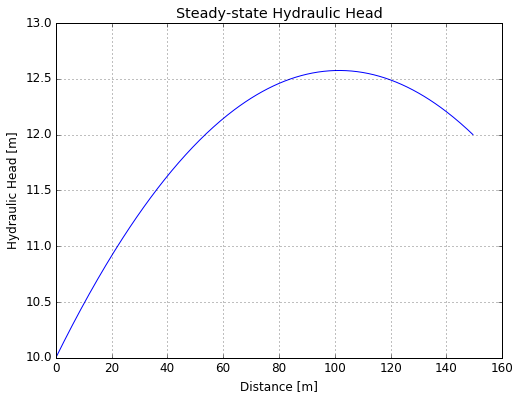

In [8]:
#Solving for hydraulic head
def hydraulic_head(bc_0,bc_1,dx,nx,max_iter, epsilon_tol):

    #Set up 1D array
    h = np.ones(nx)


    #Boundary Condition
    h[0] = bc_0
    h[-1] = bc_1

    
    #Source
    q = np.ones(nx)*((-qsource)*dx)
    

    #Solve
    for iter in range(1,int(max_iter)):
    
        # copy results from previous iteration
        h_previous = h.copy()
                    
        # perform iteration
        h =  hydraulic_head_iterative(h,T,q,dx)
        
        # check for convergence by calculating epsilon
        epsilon = np.sqrt(np.sum((h - h_previous)**2))
                      
        # if epsilon is smaller than epsilon_tol, break for loop
        if epsilon < epsilon_tol:
            break
             
    return h, iter


##################################

h, iter = hydraulic_head(bc_0,bc_1,dx,nx,max_iter,epsilon_tol)
print iter
print (type(h))


x = np.arange(0,L,dx)
plt.plot(x,h)
plt.title('Steady-state Hydraulic Head')
plt.xlabel("Distance [m]")
plt.ylabel("Hydraulic Head [m]")
plt.grid()


## Determine velocities (10 pts)

Determine now velocities from the determined head distribution and hydraulic conductivities. We discussed this step during the lecture. Perform the following steps for the analysis:

$$w_{1-\frac{1}{2}} = -K \frac{h_{i} - h_{i-1}}{\Delta x}$$
$$w_{1+\frac{1}{2}} = -K \frac{h_{i+1} - h_i}{\Delta x}$$

An obvious question when considering this equation is how to determine the value at the boundaries (w[0], w[-1]), as the calculation would require a value outside of the domain. There are several possibilities to deal with this problem. We will here simple perform a linear extrapolation from the inside nodes:

```w[0] = 2 * w[1] - w[2]
w[-1] = 2 * w[-2] - w[-3]```

And we then take arithmetic average at the node point as representative velocity value:

$$w_i = \frac{w_{1-\frac{1}{2}} + w_{1+\frac{1}{2}}}{2}$$

Note that we determine the Darcy flux (also called specific discharge, or seepage velocity) with this equation, and *not* the fluid velocity $v$! However, as we learned in the lecture, the relationship between the two velocities is rather simple:

$$v = \frac{w}{\phi}$$

Where $\phi$ is the aquifer porosity.

**Your task**: Write a function to determine specific discharge and fluid velocity:


In [9]:
def fluid_velocity(h,dx,K,por):
    
    #Determine Darcy's Flux (Specific Discharge)
    for i in range(1,len(h)-1):  
        w_minus = -K * ((h[i] - h[i-1])/dx) 
        w_plus = -K * ((h[i+1] - h[i])/dx) 
        w[i] = (w_plus + w_minus) / 2
        
    #Linear extrapolation at the boundaries    
    w[0] = 2 * w[1] - w[2]
    w[-1] = 2 * w[-2] - w[-3]
      
    #Determine fluid velocity    
    v = w/por
        
    return v

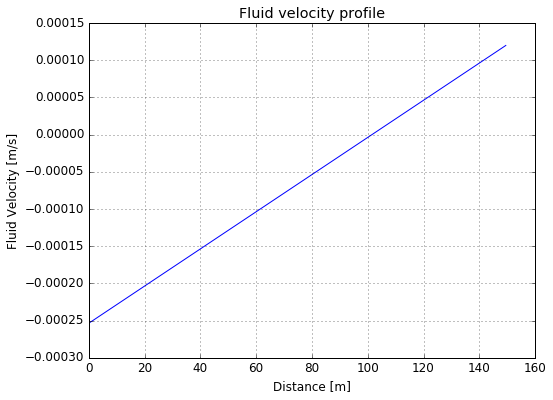

In [10]:
K = 0.001 #Hydraulic conductivity
por = 0.2 #porosity
L = 150 #Domain width
nx = 300 #Number of cells
dx = L/nx
w = np.empty(nx)
v = fluid_velocity(h,dx,K,por)

#print v

x = np.arange(0,L,dx)
plt.figure()
plt.plot(x,v)
plt.title('Fluid velocity profile')
plt.xlabel("Distance [m]")
plt.ylabel("Fluid Velocity [m/s]")
plt.grid()



## Simulate contaminant transport (10 pts)

You now have the velocity distribution and should be able to calculate the contaminant transport in the system. We are interested in a short-term prediction and will evaluate the transport for a duration of **40 days**.

We are modelling the spill as a gaussian distribution to account for the fact that the contaminant is already spreading slightly at the surface and while traveling down through the soil into the groundwater.

Relevant properties for the behaviour of the solute and the initial distribution of the spill are:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Diffusivity | kappa | 6E-5 | [m$^2$] |
| Maximum concentration | c_max | 10 | [mol/m$^3$] |
| Spread | sigma | 5 | [m] |
| Simulation time | t_total | 30 | [days]|

**Your task**: write a function to solve the transport problem. I suggest you use a Crank-Nicolson scheme to avoid problems of stability - but make sure you check the criterion for the Peclet number (Pe < 2) to avoid spatial oscillations.

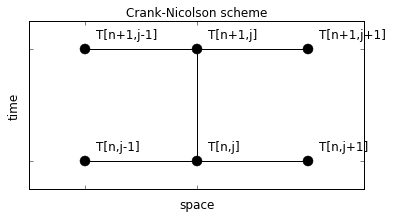

In [124]:
plt.figure(figsize=(6,3))
plt.plot([0,2],[0,0],'k')
plt.plot([0,2],[1,1],'k')
plt.plot([1,1],[0,1],'k')
plt.plot([0,1,2,0,1,2],[0,0,0,1,1,1],'ko',markersize=10)
plt.text(0.1,0.1,'T[n,j-1]')
plt.text(1.1,0.1,'T[n,j]')
plt.text(2.1,0.1,'T[n,j+1]')
plt.text(0.1,1.1,'T[n+1,j-1]')
plt.text(1.1,1.1,'T[n+1,j]')
plt.text(2.1,1.1,'T[n+1,j+1]')
plt.xlabel('space')
plt.ylabel('time')
plt.axis('equal')
plt.yticks([0.0,1.0],[])
plt.xticks([0.0,1.0],[])
plt.title('Crank-Nicolson scheme',fontsize=12)
plt.axis([-0.5,2.5,-0.5,1.5]);

In [108]:
def crank_nicholson(u,Cr,Ne):

    u_prev = u.copy()
    for i in range(1,len(u)-1):
        
        u[i] = (0.5*Cr[i]+Ne[i])*u[i-1] - (0.5*Cr[i]-Ne[i])*u[i+1] + (0.5*Cr[i]+Ne[i])*u_prev[i-1] + \
                (2-2*Ne[i])*u_prev[i] - (0.5*Cr[i]-Ne[i])*u_prev[i+1]
        
        return u

In [109]:
def gaussian(bins,sigma,mu):
    
    f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
    
    return f

In [125]:
def concentration(nx):

    #Set up domain
    L = 150 # Domain width
    nx = 300 # Number of cells
    dx = L/nx
    w = np.empty(nx)

    # Parameters
    kappa = 6e-5 # Diffusivity [m^2]
    c_max = 10 # maximum concentration [mol/m^3]
    t_total = 40 # simulation time [days]
    v = fluid_velocity(h,dx,K,por)
    t = np.arange(0,t_total,1)
    dt = 2*kappa / (v**2)#0.5*(dx**2)/kappa
    
    c = np.empty(nx)
    
    Ne = kappa*dt/(dx**2)
    Cr = v*dt/dx
    
    #Initial concentration --> Gaussian distribution
    mu = 90 #centre of distribution [m]
    sigma = 5 # spread [m]
    bins = np.arange(0,L,dx)
    c = gaussian(bins,mu,sigma)
    
   
    
    # Check Peclet number(Pe<2)
    Pe = (v*dx)/kappa
    
    for t in xrange(t_total): 
        for Pe.any() <2:
            c = crank_nicholson(c,Cr,Ne)
        
   
    return c
        
        
            
   


SyntaxError: invalid syntax (<ipython-input-125-7c806c2722c2>, line 34)

[  4.42585671e-03   3.31324890e+00   4.42831620e-03   4.42934139e-03
   4.43023008e-03   4.43098219e-03   4.43159765e-03   4.43207640e-03
   4.43241839e-03   4.43262360e-03   4.43269200e-03   4.43262360e-03
   4.43241839e-03   4.43207640e-03   4.43159765e-03   4.43098219e-03
   4.43023008e-03   4.42934139e-03   4.42831620e-03   4.42715460e-03
   4.42585671e-03   4.42442263e-03   4.42285251e-03   4.42114650e-03
   4.41930474e-03   4.41732740e-03   4.41521468e-03   4.41296676e-03
   4.41058386e-03   4.40806619e-03   4.40541399e-03   4.40262749e-03
   4.39970696e-03   4.39665267e-03   4.39346490e-03   4.39014394e-03
   4.38669009e-03   4.38310368e-03   4.37938503e-03   4.37553449e-03
   4.37155240e-03   4.36743914e-03   4.36319508e-03   4.35882062e-03
   4.35431614e-03   4.34968207e-03   4.34491882e-03   4.34002684e-03
   4.33500657e-03   4.32985846e-03   4.32458299e-03   4.31918064e-03
   4.31365190e-03   4.30799727e-03   4.30221726e-03   4.29631241e-03
   4.29028324e-03   4.28413031e-03

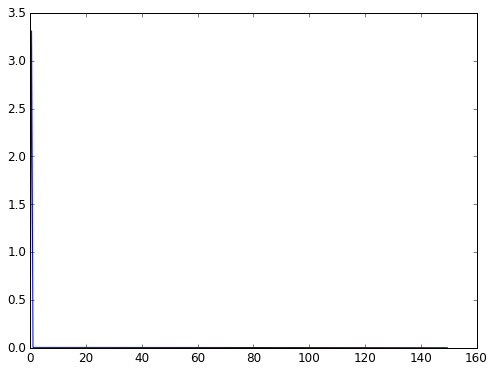

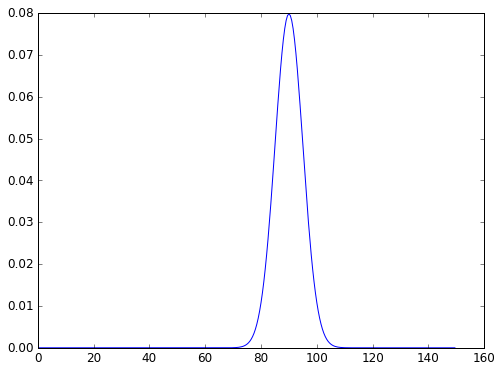

In [114]:
a = concentration(300)
print a

x = np.arange(0,L,dx)
plt.figure()
plt.plot(x,a)

plt.figure()
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)))

## Determine breakthrough curves (10 pts)

In our problem description, we were mainly interested in the question if parts of the contaminant plume arrive at the source at the right side of the problem, rather than the distribution in space. 

Let's say that only a certain contaminant density actually leads to a problem, say once a critical value is reached:

$$c(x) > c_{crit}$$

As a critical value, we consider here as an example:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Critical concentration | c$_{crit}$ | 0.01 | [mol/m$^3$] |

We can determine this criterion on the basis of our simulation. A simple way is to determine if - and when - a contamination plume reaches a point is to plot "breakthrough curves" at a location: the concentration over time at a given position.


**Your task**: extend your code to create a plot of concentration vs. time at a given location. Evaluate the breakthrough curves at both sides of the model domain (x = 1 and x = -1, to limit effect of boundary values):

In [ ]:
# your code here:


## Analysis of model sensitivity (20 pts + 10 pts bonus)

You obtained a result through your previous analysis and might now be tempted to bring the good (or bad?) news to your customer/ the king. As your motivation to get the results of the study correct is very high, you are interested to evaluate how robust your results are.

The first step is to combine all the previous steps into a single function call to make testing of different parameters easier:

**Your task (10 pts)**: combine all the previous steps into a single function call to enable the quick testing of different settings. The function should have all relevant rock  properties and boundary values as input, and produce plots of solute concentration over time and breakthrough curves at both ends.

As an idea: your function call could look like this:

```contamination_analysis(T=0.01, K=0.001, q_in=2.E-4, 
                          spill_loc=95,
                          t_total=40 * 24 * 3600.,
                          kappa=8E-5, nx=300, por=0.2,
                          bc_0 = 10, bc_1=12.
```


In [ ]:
# Your code here:


Now that we have this function, we can test the sensitivity of the model output with respect to the defined rock properties and boundary conditions.

If you consider again the set-up of our problem before: which parameters or boundary condition would you expect to be uncertain? Decide on (at least) one parameter and evaluate how sensitive the result are with respect to this parameter.

Possible parameter changes are:

- dirichlet boundary conditions: what if the head value at the source is lower (11 m) or higher (13 m)?
- recharge/ rain fall: what happens if our estimate is wrong (half/ double the value that we used)?
- how about the exact location of the spill and the estimated initial spread?

**Your task (10 pts + 10 bonus pts)**: Test the influence of parameter uncertainties on the potential contamination at the water source/ pool. You get full points for the analysis and brief discussion of one parameter (examples in the list above).

In addition, I am giving up to 10 bonus points to, for example, (a) a detailed discussion of several parameters, (b) creative ways to perform the analysis, or (c) a very good representation of the results!

So: what are the implications of these results for the specific scenario above that you considered? 

In [ ]:
# Your code here:
